# Clustering

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Part1: Data preparation

In [3]:
# Read the data from the file
# Data from https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data?select=Country-data.csv
df = pd.read_csv('Data_P5.csv')

In [4]:
# Check the first few lines to see the column names and type of content
df.head()

,customer_id,tran_amount_2011,tran_amount_2012,tran_amount_2013,tran_amount_2014,tran_amount_2015,transactions_2011,transactions_2012,transactions_2013,transactions_2014,transactions_2015,First_Transaction,Latest_Transaction
0,CS2945,153.0,516.0,173.0,1029.0,40.0,2.0,7.0,3.0,13.0,1.0,18-May-11,08-Mar-15
1,CS4074,269.0,429.0,737.0,1027.0,NaN,3.0,6.0,10.0,15.0,NaN,29-May-11,05-Dec-14
2,CS4798,153.0,536.0,414.0,1001.0,47.0,2.0,7.0,6.0,11.0,1.0,01-Jul-11,21-Feb-15
3,CS4424,547.0,380.0,921.0,984.0,101.0,7.0,5.0,13.0,13.0,1.0,25-May-11,19-Jan-15
4,CS5057,290.0,235.0,509.0,974.0,NaN,4.0,4.0,6.0,12.0,NaN,10-Jul-11,02-Dec-14


In [5]:
# Size of the dataframe
len(df)

6889

In [6]:
# Remove rows with empty values
df = df.replace(r'^\s*$', float('NaN'), regex = True)
df.dropna(inplace = True)
len(df)

3889

In [7]:
# Let us check the types of the different columns
df.dtypes

customer_id            object
tran_amount_2011      float64
tran_amount_2012      float64
tran_amount_2013      float64
tran_amount_2014      float64
tran_amount_2015      float64
transactions_2011     float64
transactions_2012     float64
transactions_2013     float64
transactions_2014     float64
transactions_2015     float64
First_Transaction      object
Latest_Transaction     object
dtype: object

In [8]:
# Let us adapt the dataframe (remove IDs, and make sure that columns have the right type)
del df['customer_id']
del df['First_Transaction']
del df['Latest_Transaction']

## Part 2: Data exploration

In [9]:
# Lets see the summary of the numerical columns
df.describe()

,tran_amount_2011,tran_amount_2012,tran_amount_2013,tran_amount_2014,tran_amount_2015,transactions_2011,transactions_2012,transactions_2013,transactions_2014,transactions_2015
count,3889.000000,3889.000000,3889.000000,3889.000000,3889.000000,3889.000000,3889.000000,3889.000000,3889.000000,3889.000000
mean,212.805863,325.360504,329.967344,320.342247,104.460530,3.208023,4.899717,4.967858,4.826434,1.587812
std,130.843471,174.598658,175.751280,168.643805,66.709142,1.730321,2.264010,2.282007,2.191796,0.848362
min,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,108.000000,192.000000,194.000000,192.000000,57.000000,2.000000,3.000000,3.000000,3.000000,1.000000
50%,191.000000,308.000000,311.000000,303.000000,86.000000,3.000000,5.000000,5.000000,5.000000,1.000000
75%,292.000000,439.000000,446.000000,431.000000,138.000000,4.000000,6.000000,6.000000,6.000000,2.000000
max,849.000000,1230.000000,1203.000000,1029.000000,538.000000,11.000000,18.000000,15.000000,14.000000,7.000000


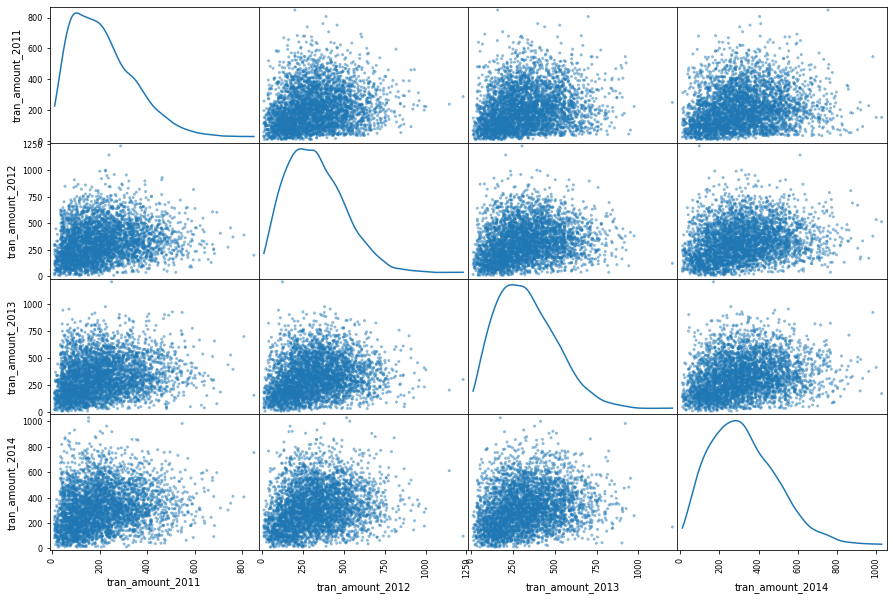

In [13]:
# Matrix scatter plot of the amounts
fig = pd.plotting.scatter_matrix(df.iloc[:,0:4], diagonal='kde', figsize=(15,10));

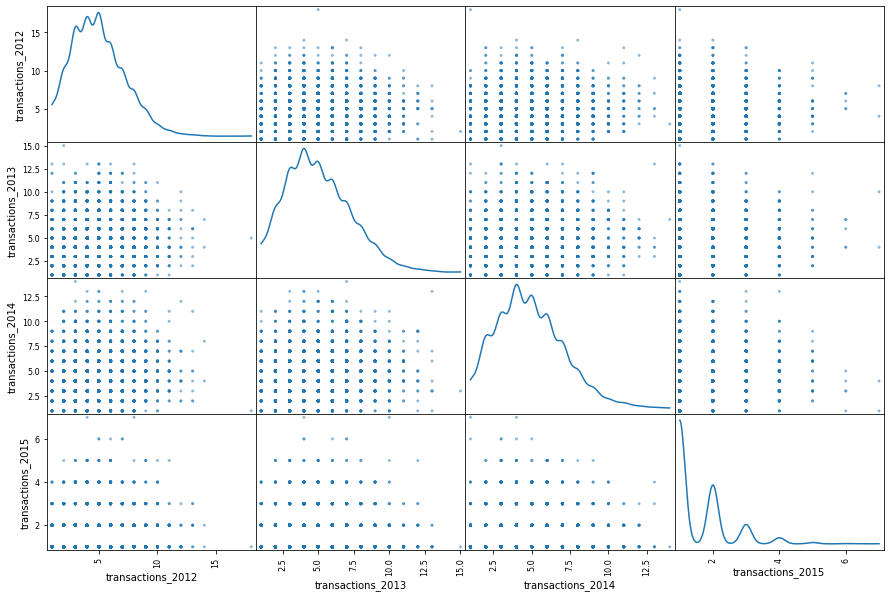

In [14]:
# Matrix scatter plot of the amounts
fig = pd.plotting.scatter_matrix(df.iloc[:,-4:], diagonal='kde', figsize=(15,10));

In [18]:
# Let us explore the correlation matrix
corrMatrix = df.corr()

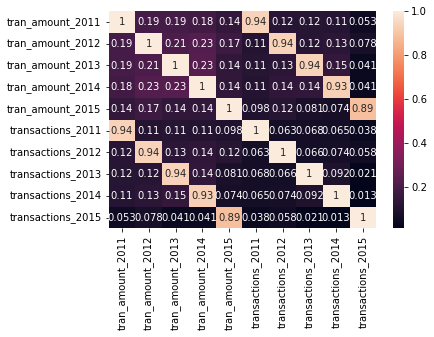

In [19]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Clustering of variables

Clustering is one of those tools that do not imply pairs (X,y), but only a collection of {x}.

In [22]:
# Let us normalize the data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
Xnorm = scaler.transform(df)

In [25]:
import scipy.cluster.hierarchy as hc

pdist = hc.distance.pdist(df.corr().values)
linkage = hc.linkage(pdist, method='complete')

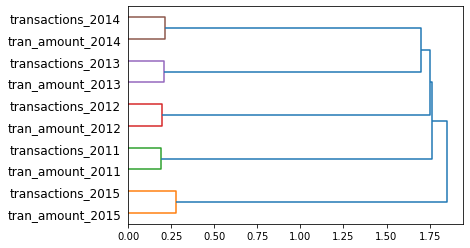

In [30]:
fig=hc.dendrogram(linkage, labels=df.columns, orientation='right')

## Clustering of observations

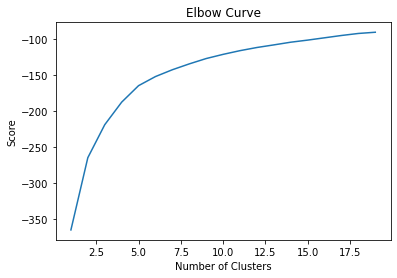

In [35]:
# Let us observe the classification error as a function of the number of clusters
X=pd.DataFrame(Xnorm[:,0:4],columns=['Amount%d'%i for i in range(2011,2015)])

from sklearn.cluster import KMeans
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [38]:
# Quantize the input data to 5 clusters
kmeans = KMeans(n_clusters=6).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.27222473 0.29362634 0.31558452 0.58392647]
 [0.21272109 0.26741703 0.48295087 0.2851324 ]
 [0.49918902 0.25751225 0.28598814 0.29802987]
 [0.24780486 0.47573859 0.24988693 0.28012369]
 [0.12321882 0.13418131 0.13922728 0.13850793]
 [0.18072598 0.21566965 0.21422755 0.35546024]]


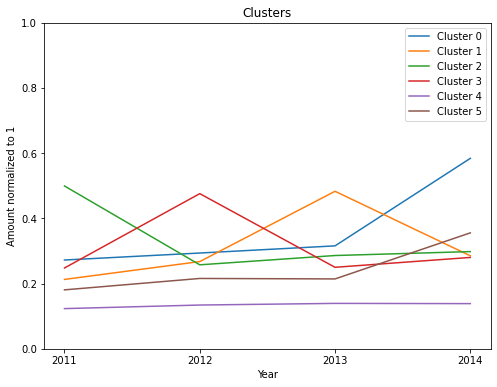

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.plot(centroids.transpose())
ax.set_xlabel('Year')
ax.set_ylabel('Amount normalized to 1')
plt.title('Clusters')
ax.legend(['Cluster %d'%i for i in range(6)])
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['%d'%i for i in range(2011,2015)])
plt.ylim([0, 1]);